In [13]:
import pandas as pd
df = pd.read_csv(r"C:\Users\admln\Downloads\data\data.csv")

 # Assignment 1(a)

In [12]:
#1 Check column name with data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [14]:
#2 Check missing values and handle missing values

# step 1 check missing values count
df["Area"].isnull().sum

# step 2 fill missing values by ffill, bfill, mean , mode
df["Area"].ffill()
df["Area"].bfill()
df["Area"] = df["Area"].fillna(df["Area"].mean())


In [15]:
# drop null values
df["Area"].dropna

<bound method Series.dropna of 0       1360
1       4272
2       3592
3        966
4       4926
        ... 
1995    4994
1996    3046
1997    1062
1998    4062
1999    2989
Name: Area, Length: 2000, dtype: int64>

In [52]:
#3 check unique values in the column having discret values
df["Floors"].value_counts()

2    691
1    661
3    648
Name: Floors, dtype: int64

In [21]:
#4 Check description of dataset
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [22]:
#5 Check correlation of feature in dataset
df.corr()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
Id,1.000000,-0.012966,-0.016393,-0.025433,-0.002025,0.008840,-0.025643
Area,-0.012966,1.000000,0.047523,0.021881,0.017749,-0.011609,0.001542
Bedrooms,-0.016393,0.047523,1.000000,-0.011990,0.010435,-0.014125,-0.003471
Bathrooms,-0.025433,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.015737
Floors,-0.002025,0.017749,0.010435,0.029089,1.000000,-0.006474,0.055890
YearBuilt,0.008840,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,0.004845
Price,-0.025643,0.001542,-0.003471,-0.015737,0.055890,0.004845,1.000000


<AxesSubplot:xlabel='Area', ylabel='Density'>

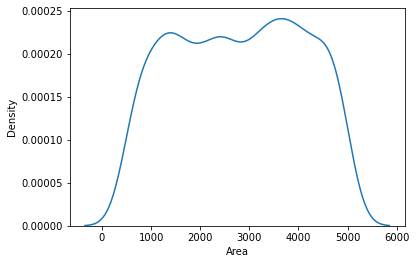

In [29]:
#6 visualise data distribution 

# a check univariate distribution
import seaborn as sb
sb.kdeplot(df["Area"])

<AxesSubplot:xlabel='Area', ylabel='Count'>

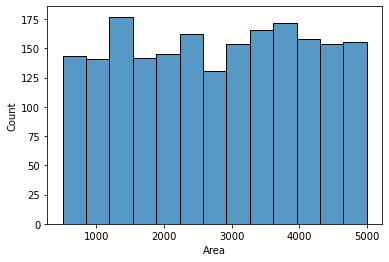

In [30]:
sb.histplot(df["Area"])

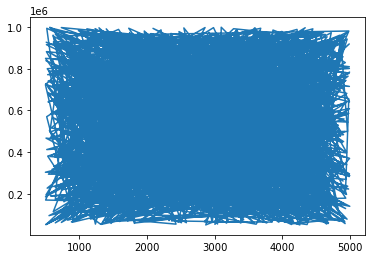

In [27]:
# b check bivariate distribution
import matplotlib.pyplot as plt
plt.plot(df['Area'], df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Floors', ylabel='count'>

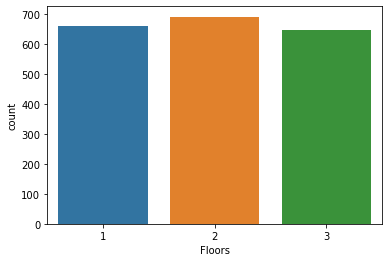

In [32]:
# c check the count of unique values in features
sb.countplot(df['Floors'])

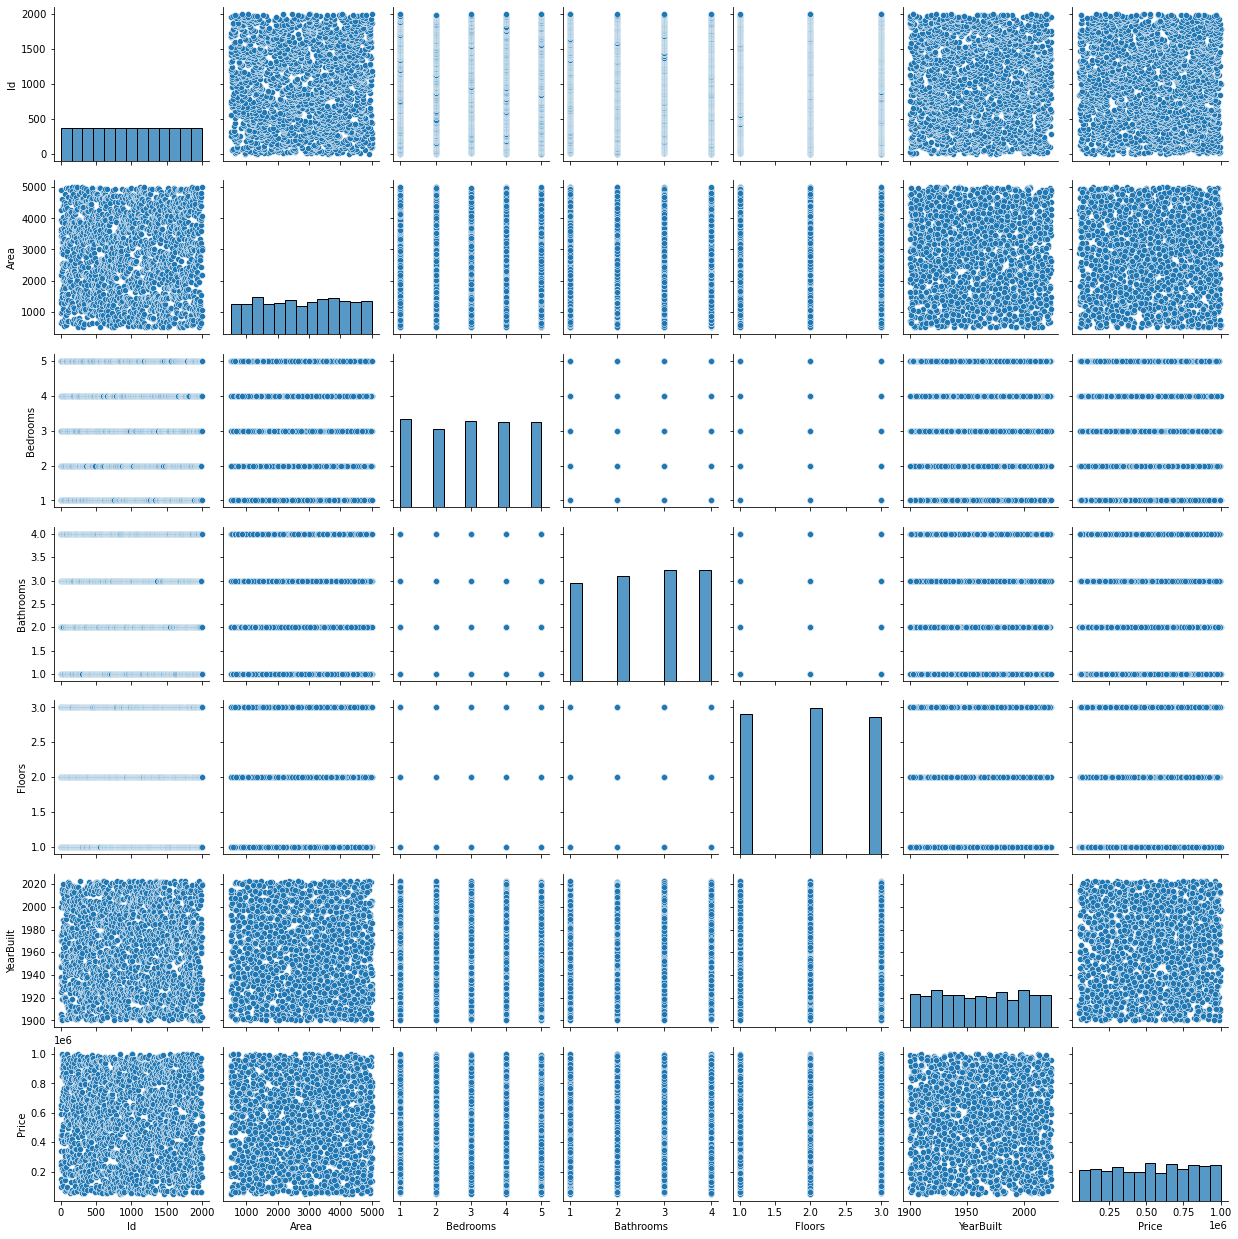

In [33]:
# d check relationshipo between y feature with x feature
sb.pairplot(df)

 Assignment1 b

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area'>

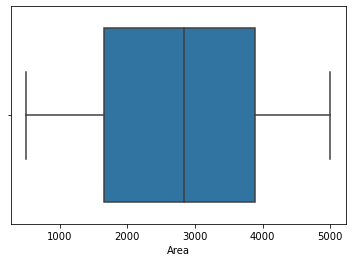

In [55]:
# 1 handle outliers

# a check outliers using graph
sb.boxplot(df['Area'])

In [56]:
# b check count of outliers
import numpy as np
import statistics

def calculate_outliers(x):
    o1=np.percentile(x,25)
    o3=np.percentile(x,75)
    IQR = o3 -o1
    threshold1 =o1 -1.5* IQR
    threshold2 =o3 +1.5* IQR
    count =0
    L=[]
    for i in x:
        if i<threshold1 or i>threshold2:
            count= count+1
        else:
            L.append(i)
            
    print("No of outliers", count)
    print("% of outliers", count/len(x))

calculate_outliers(df['Area'])

No of outliers 0
% of outliers 0.0


In [57]:
# 2 encoding object value in numerical value

# a) label encoder
# b) one hot encoder

In [58]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
one_hot_encode = preprocessing.OneHotEncoder()

df["Location"]= label_encode.fit_transform(df["Location"])

In [59]:
df["Location"].unique()

array([0, 2, 3, 1], dtype=int64)